# Airline passenger satisfaction EDA + Prediction
### EN version

Disclaimer: Please note that this a more concise version of the pt-Br ver. Also, The way of explaining the whole process will have some differences as well.

### Dataset content

| Feature | Detalhes |
| -: | :- |
|**Gender**| Gender of the passengers (Female, Male)|
|**Customer Type**| The customer type (Loyal customer, disloyal customer)
|**Age**| The actual age of the passengers
|**Type of Travel**| Purpose of the flight of the passengers (Personal Travel, Business Travel)
|**Class**| Travel class in the plane of the passengers (Business, Eco, Eco Plus)
|**Flight distance**| The flight distance of this journey
|**Inflight wifi service**|Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
|**Departure/Arrival time convenient**| Satisfaction level of Departure/Arrival time convenient
|**Ease of Online booking**| Satisfaction level of online booking
|**Gate location**| Satisfaction level of Gate location
|**Food and drink**| Satisfaction level of Food and drink
|**Online boarding**| Satisfaction level of online boarding
|**Seat comfort**| Satisfaction level of Seat comfort
|**Inflight entertainment**| Satisfaction level of inflight entertainment
|**On-board service**| Satisfaction level of On-board service
|**Leg room service**| Satisfaction level of Leg room service
|**Baggage handling**| Satisfaction level of baggage handling
|**Check-in service**| Satisfaction level of Check-in service
|**Inflight service**| Satisfaction level of inflight service
|**Cleanliness**| Satisfaction level of Cleanliness
|**Departure Delay in Minutes**| Minutes delayed when departure
|**Arrival Delay in Minutes**|  Minutes delayed when Arrival
|**Satisfaction**| Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


### Context and goal

Define which key factors are most correlated with a passenger's satisfaction and come up with a model that can predict a passenger's satisfaction.

To define the level of passenger satisfaction, we will use the following classes:

   **0**: Neutral or dissatisfaction <br>
   **1**: Satisfaction

In [1]:
#Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping


## Importing data

Please note that is provided a dataset for training and another dataset for test. For the exploratory data analysis part, we will use only the training dataset

In [3]:
#Importing datasets train.csv and test.csv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# EDA (Exploratory data analysis)

Let's explore the data a bit in order to better understand this dataset.

In [6]:
#Olhando como é as 5 primeiras linhas do dataset
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
#Dimensions (number of rows, number of columns)
train.shape

(103904, 25)

In [9]:
#All columns names
list(train.columns)

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [12]:
#Type of each feature and the amount on non-null
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [14]:
# The feature Arrival Delay in Minutes has 310 null values
display(train.isnull().sum())
print(f"A feature Arrival Delay in Minutes possui {train['Arrival Delay in Minutes'].isnull().sum()} valores nulos")

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

A feature Arrival Delay in Minutes possui 310 valores nulos


In [17]:
#Looking further the columns with null values
train['Arrival Delay in Minutes'].describe().apply(lambda x: round(x, 2))

count    103594.00
mean         15.18
std          38.70
min           0.00
25%           0.00
50%           0.00
75%          13.00
max        1584.00
Name: Arrival Delay in Minutes, dtype: float64

Although the maximum value is 1584 minutes, the median is still 0 and the mean value is relatively low, 15.09. In this sense, we can conclude that the highest frequency of values is at 0 minutes delay.

Let's check below:

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Count'>

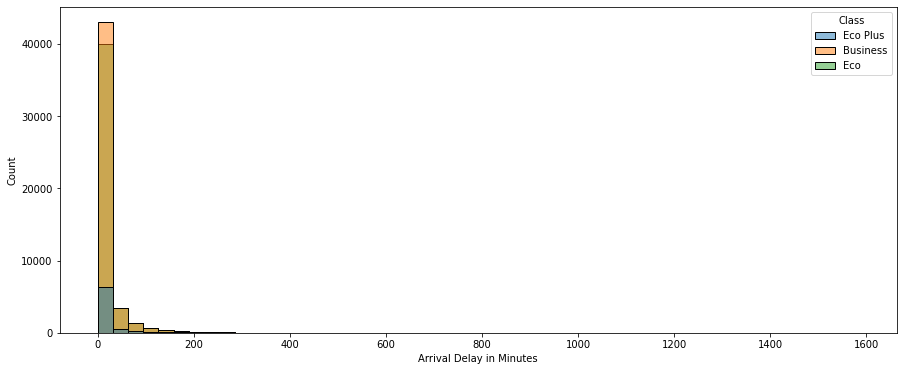

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=train, x="Arrival Delay in Minutes", hue="Class", bins = 50)

In [23]:
# Checking the 10 most frequent occurrences

display(train['Arrival Delay in Minutes'].value_counts()[:10])

0.0     58159
1.0      2211
2.0      2064
3.0      1952
4.0      1907
5.0      1658
6.0      1616
7.0      1481
8.0      1394
9.0      1264
10.0     1181
Name: Arrival Delay in Minutes, dtype: int64

As we can see below, the number of 0 minutes of delay is 56% of the entire dataset.

In [30]:
print(f" As we can see above, the number of 0 minutes of delay are more than half of the data. It is approximately {train['Arrival Delay in Minutes'].value_counts()[0]/train.shape[0]:.2f}%")

 As we can see above, the number of 0 minutes of delay are more than half of the data. It is approximately 0.56%


In [31]:
#Excluding dupplicate rows
train.drop_duplicates(inplace=True)

In [34]:
# Numerical features
train_num = train.loc[:, train.dtypes != object]
train_num

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [37]:
# Non numeric data
train_cat = train.loc[:, train.dtypes == object]
train_cat

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [38]:
train.describe().apply(lambda x: round(x, 1))

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103594.0
mean,51951.5,64924.2,39.4,1189.4,2.7,3.1,2.8,3.0,3.2,3.3,3.4,3.4,3.4,3.4,3.6,3.3,3.6,3.3,14.8,15.2
std,29994.6,37463.8,15.1,997.1,1.3,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.2,38.7
min,0.0,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,25975.8,32533.8,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,51951.5,64856.5,40.0,843.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,77927.2,97368.2,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,103903.0,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


In [39]:
train.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

### Data distribution

In [40]:
def divide_col(df_col, n):
    '''
    Divide the columns of the dataset into blocks of size n
    '''
    
    for i in range(0, len(df_col), n):
        yield df_col[i:i + n]

Let's see how the data is distributed in pairplots.

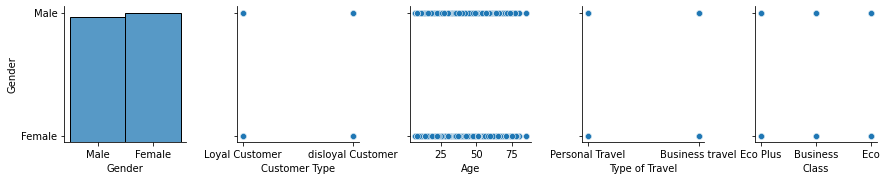

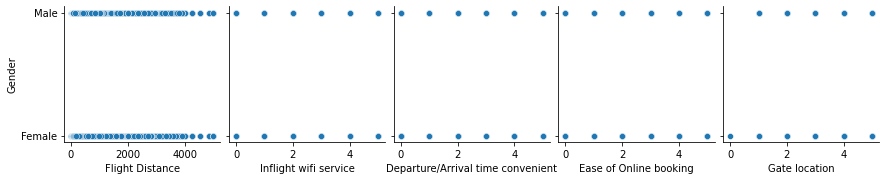

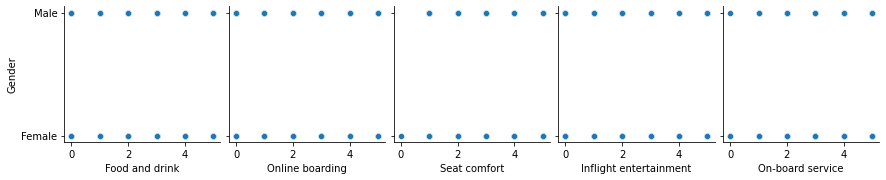

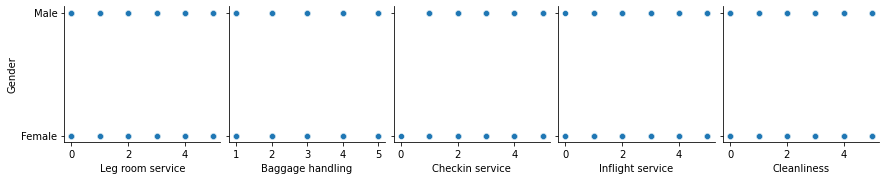

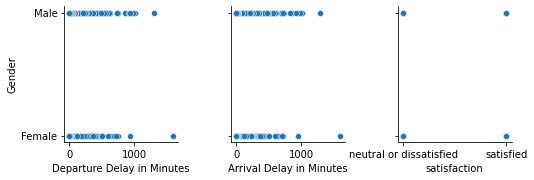

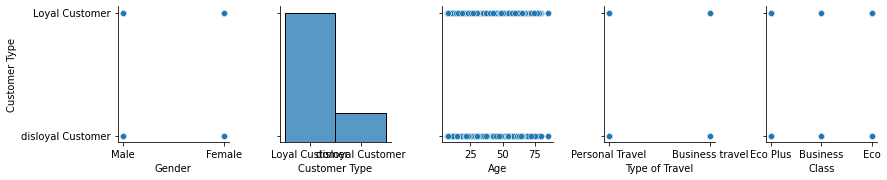

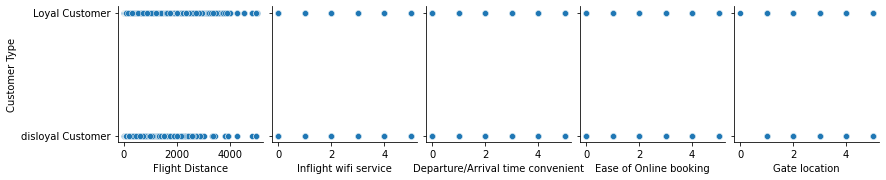

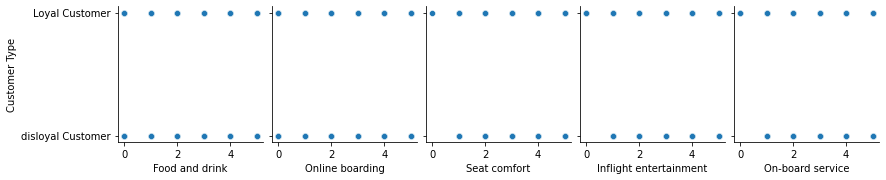

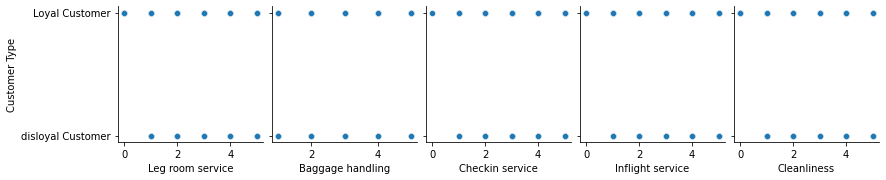

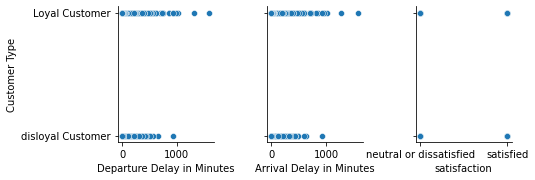

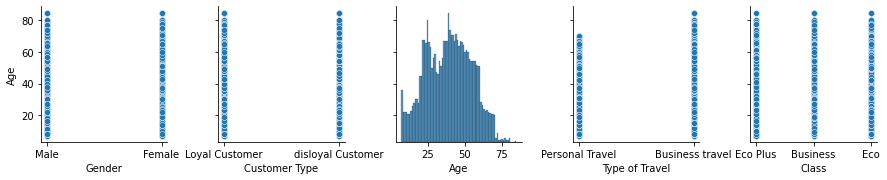

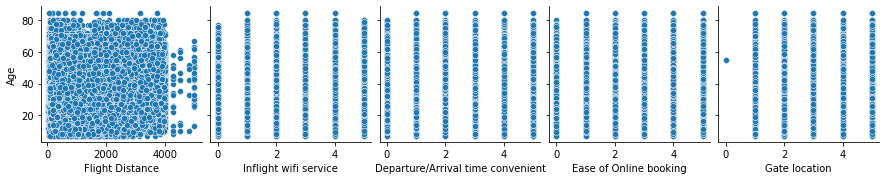

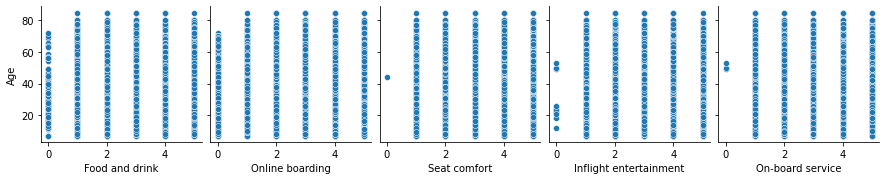

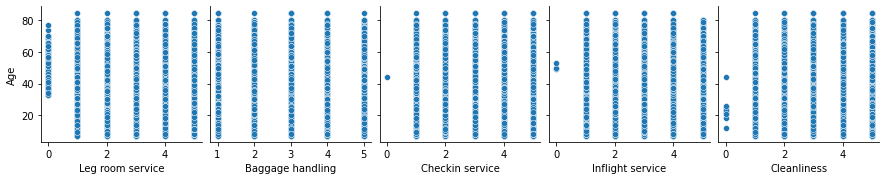

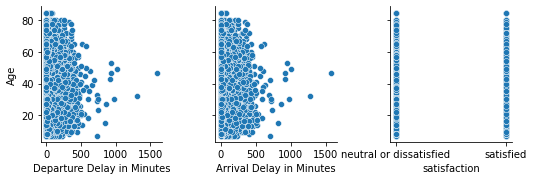

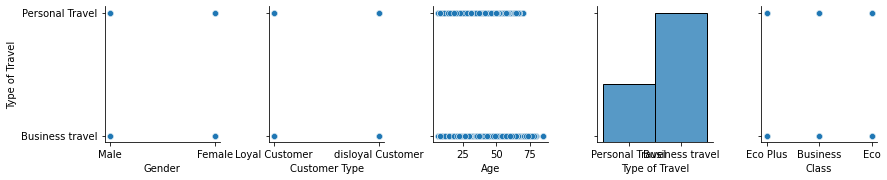

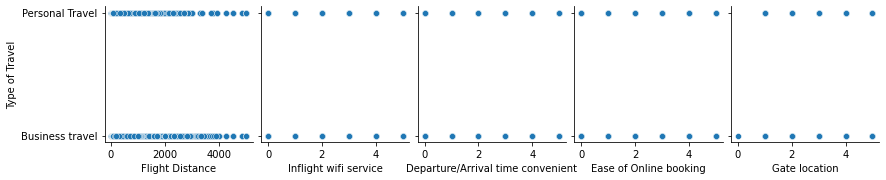

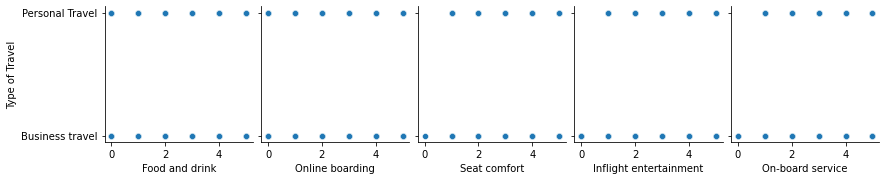

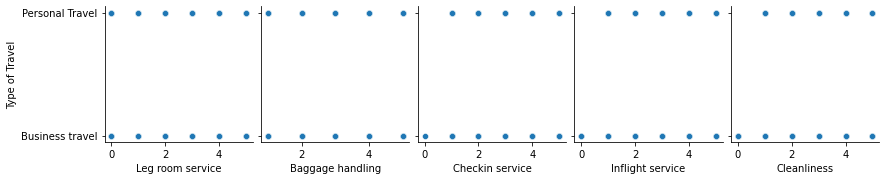

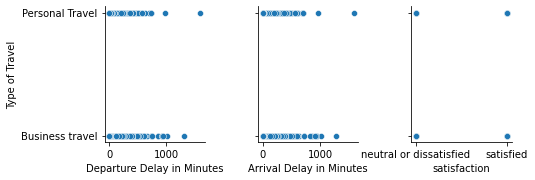

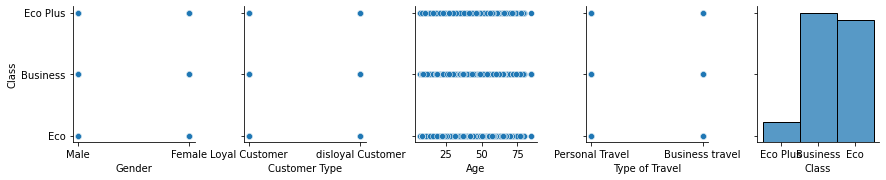

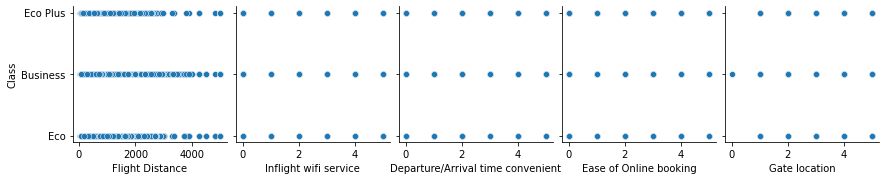

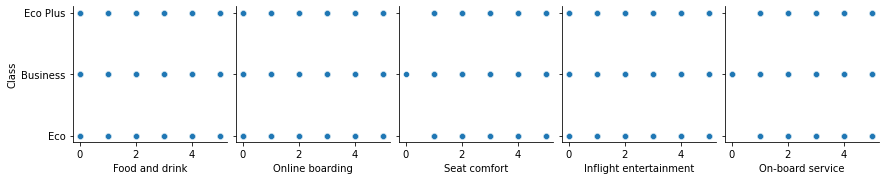

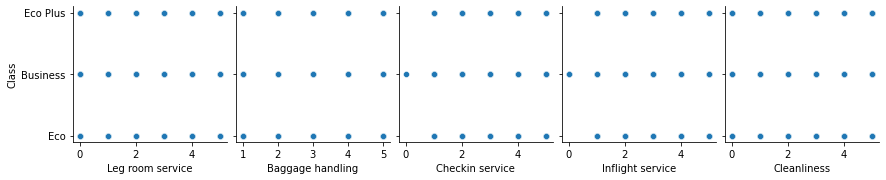

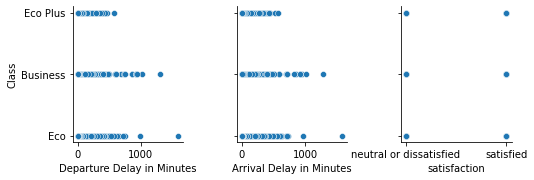

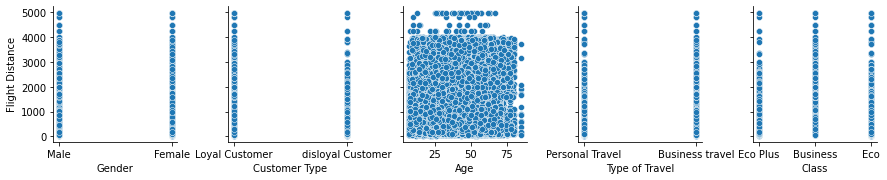

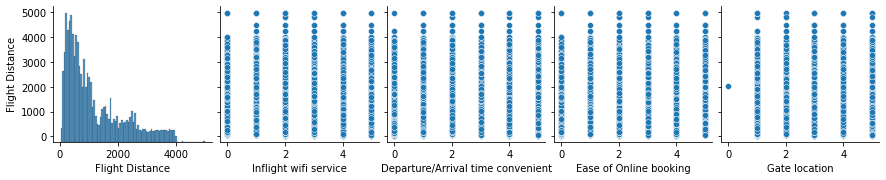

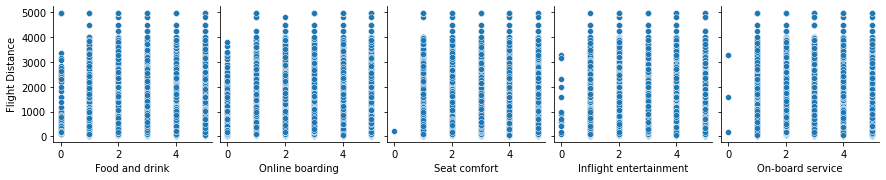

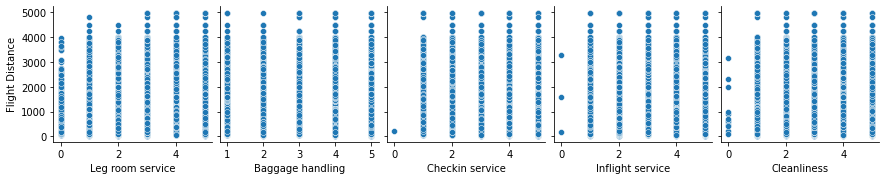

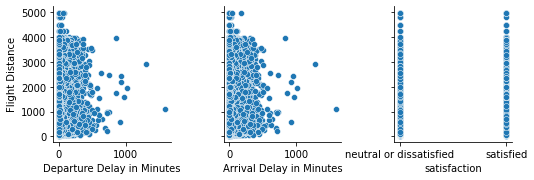

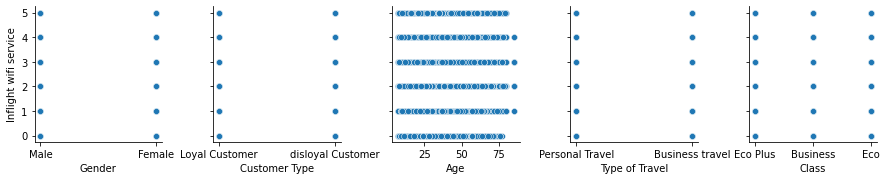

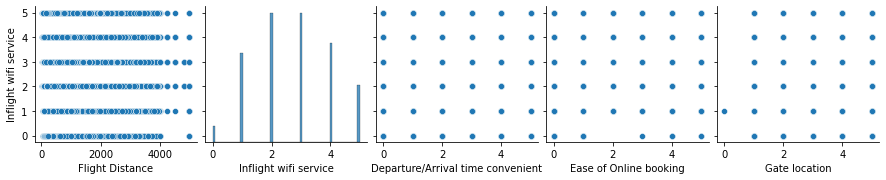

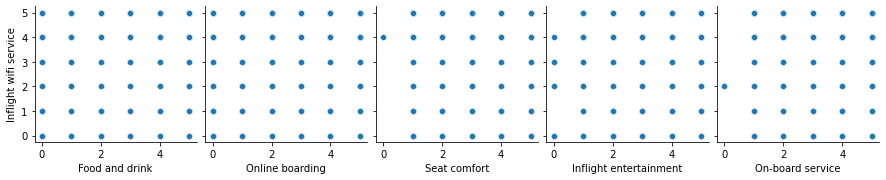

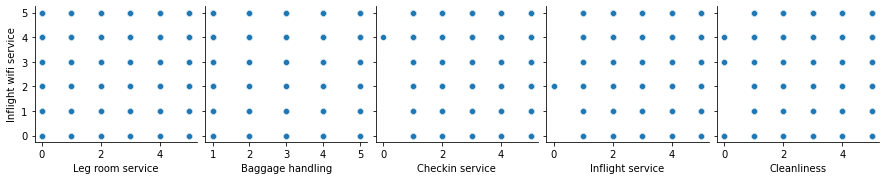

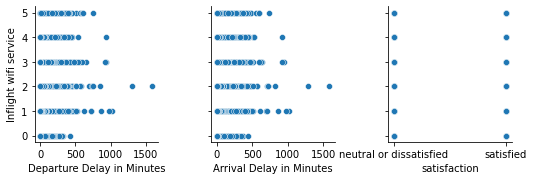

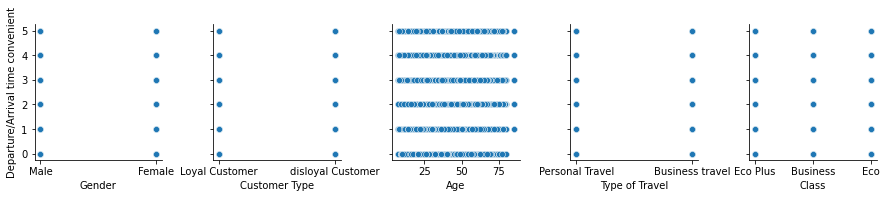

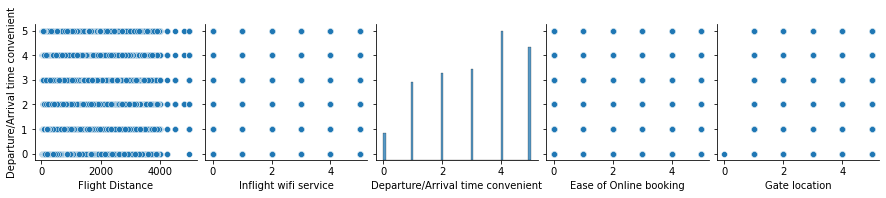

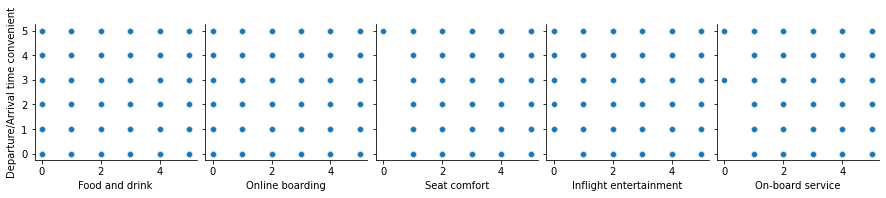

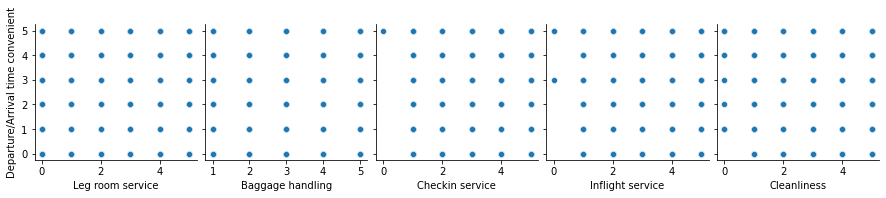

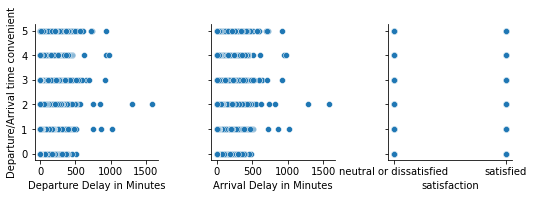

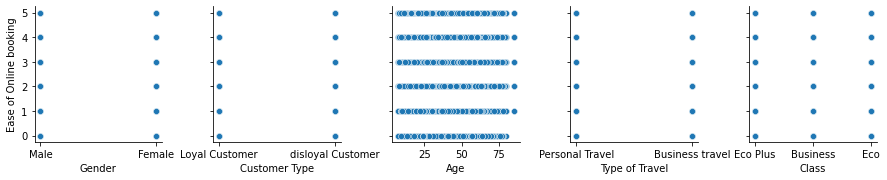

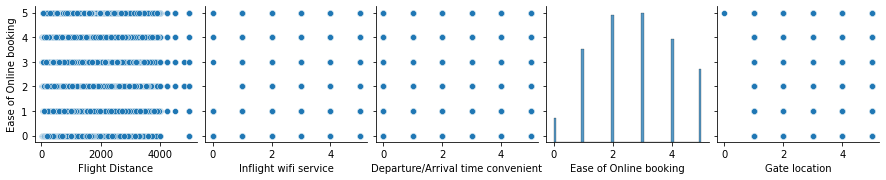

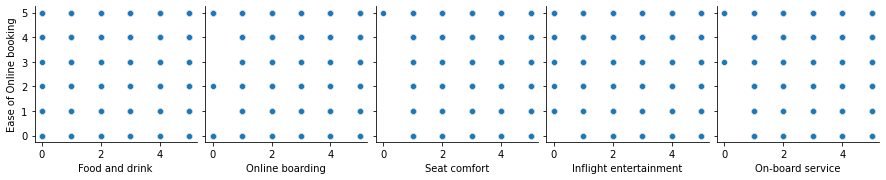

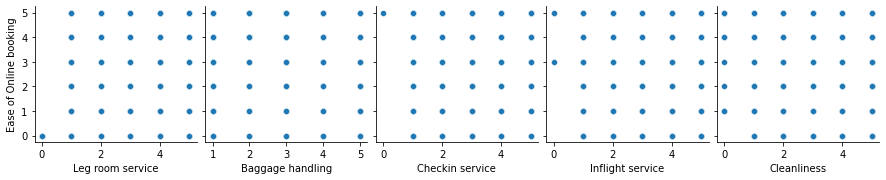

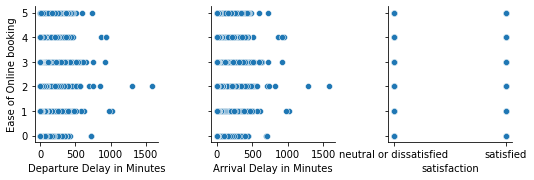

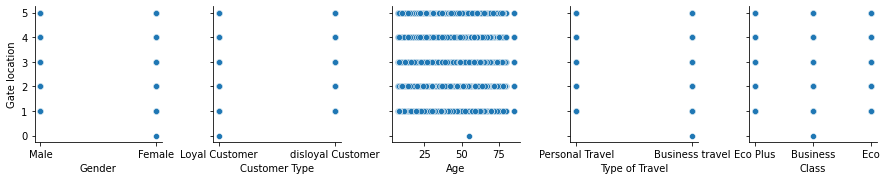

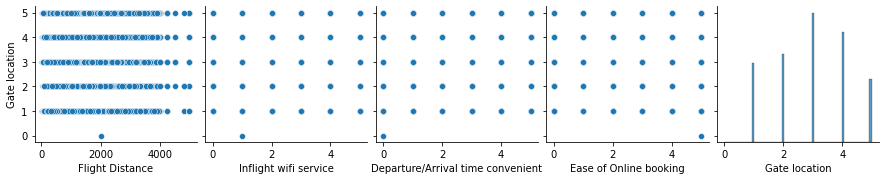

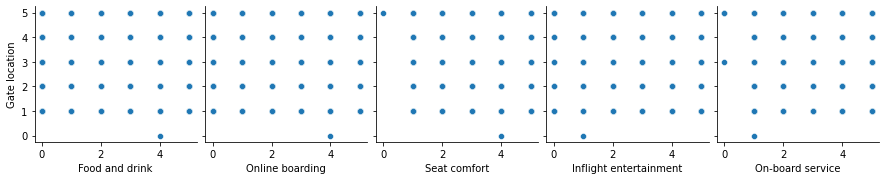

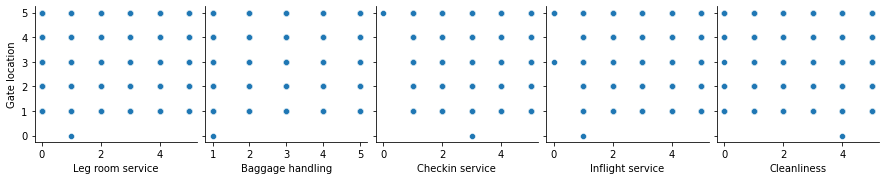

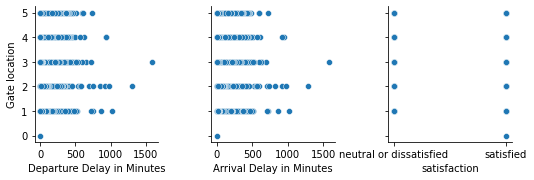

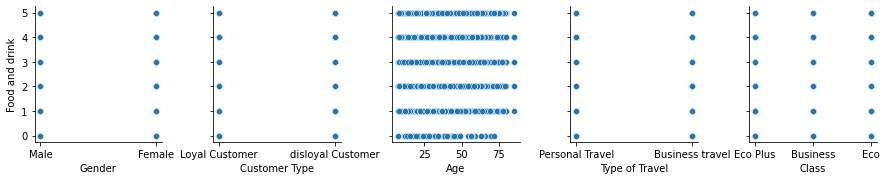

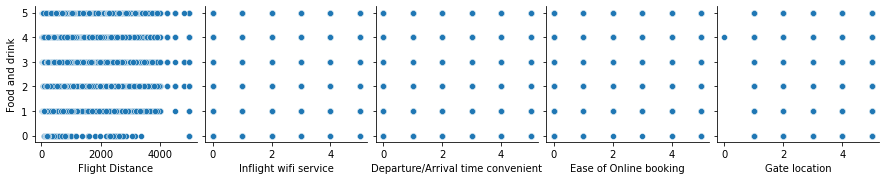

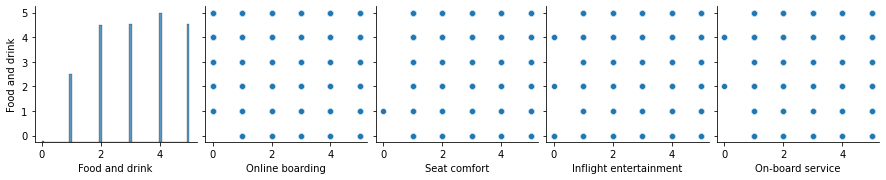

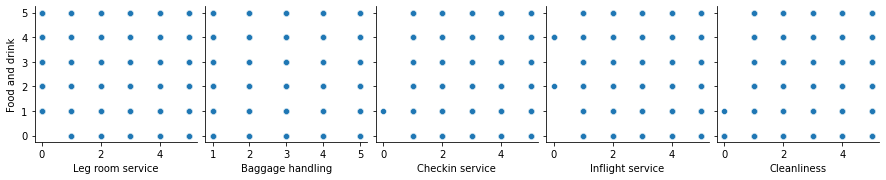

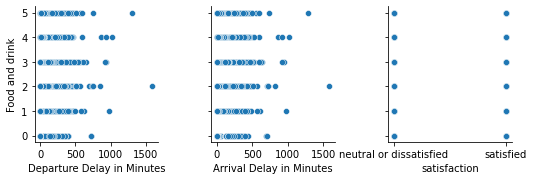

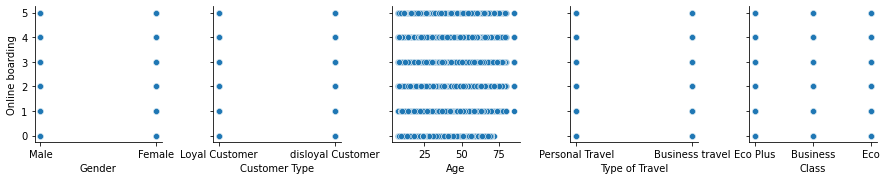

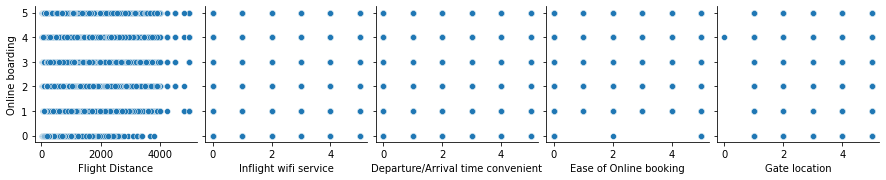

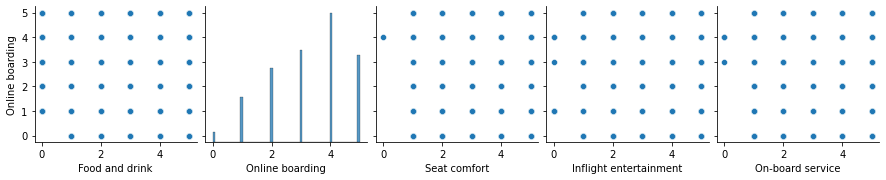

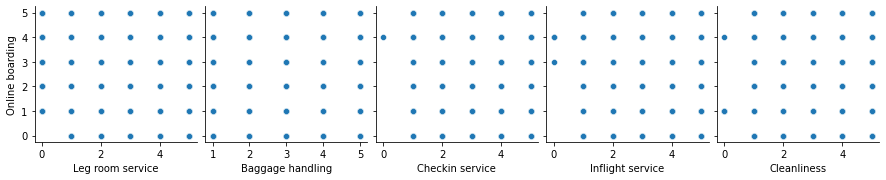

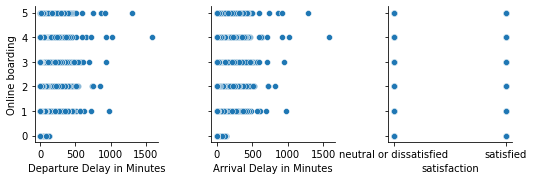

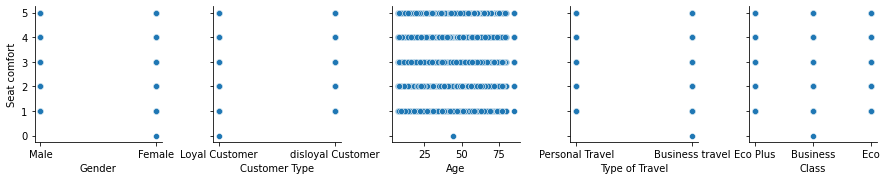

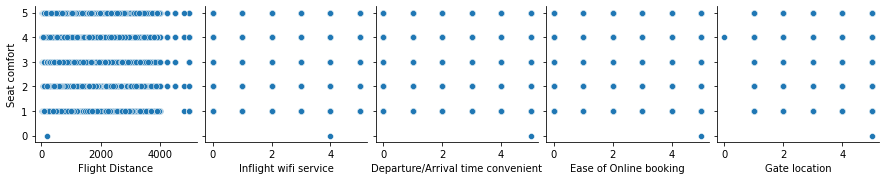

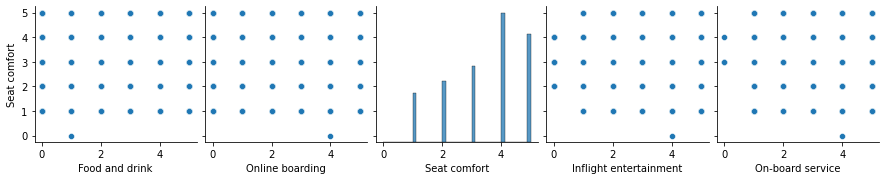

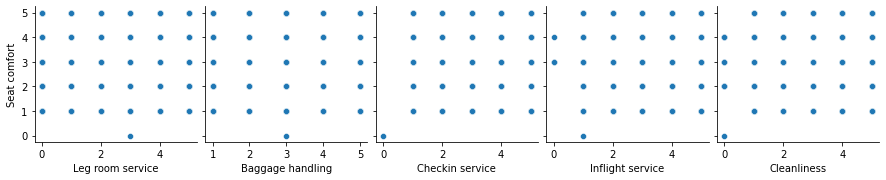

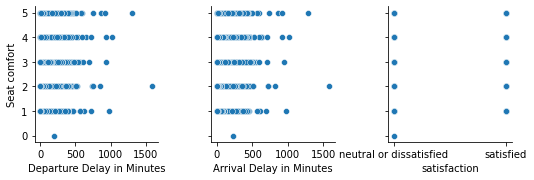

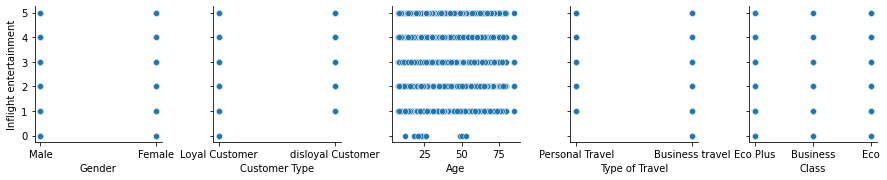

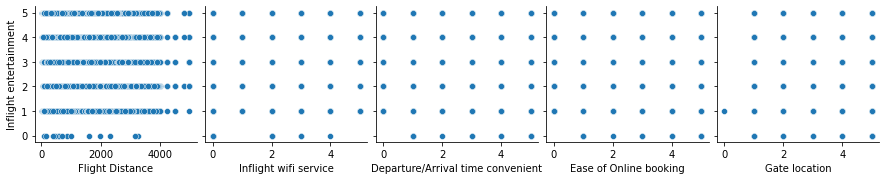

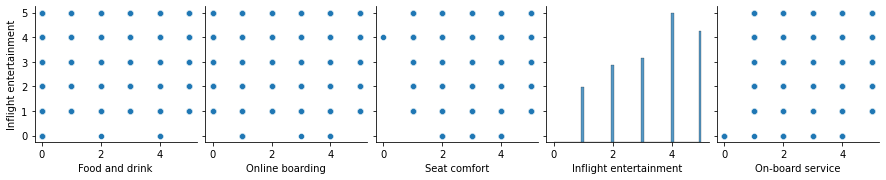

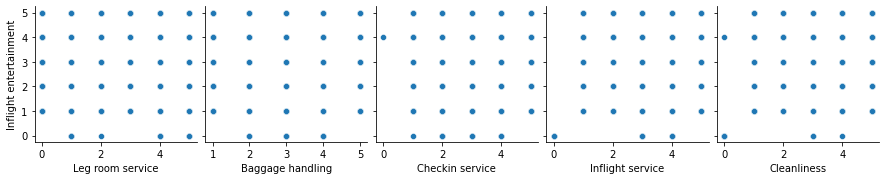

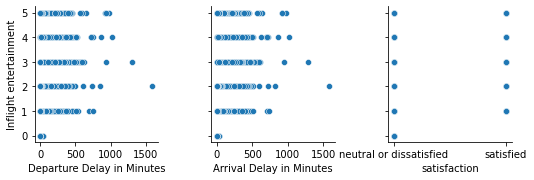

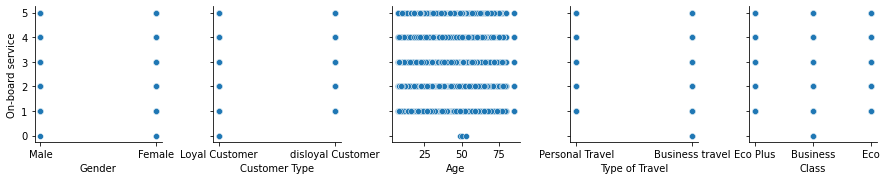

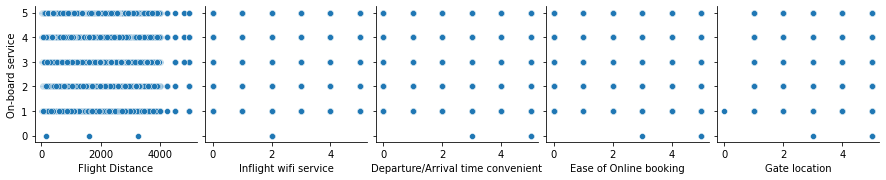

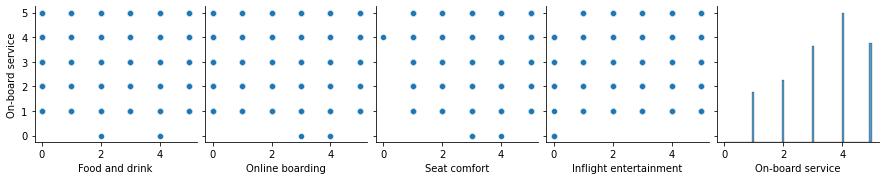

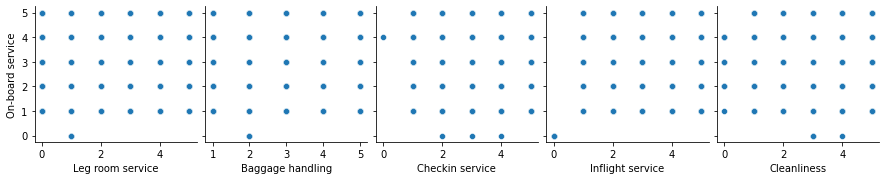

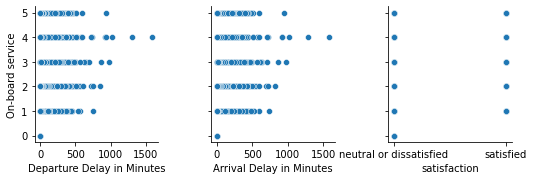

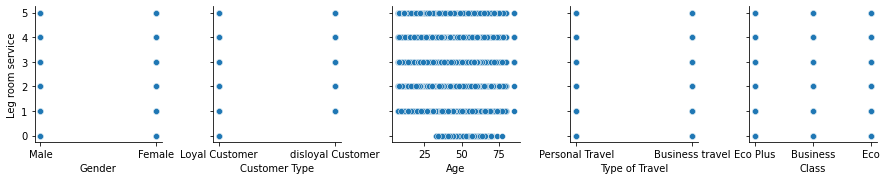

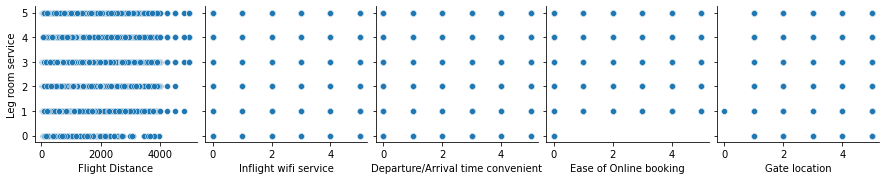

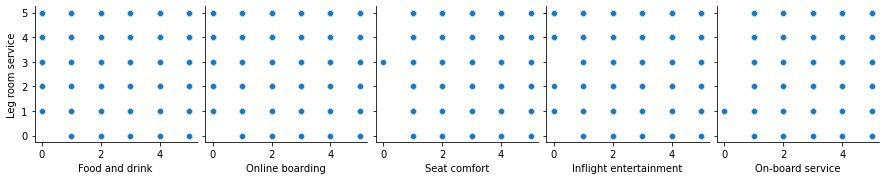

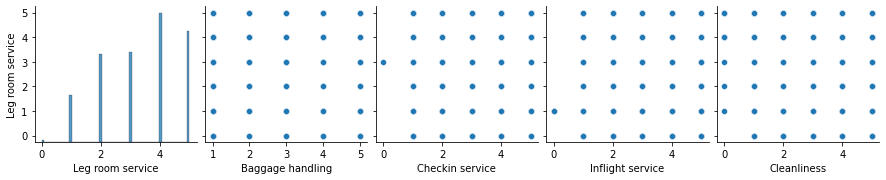

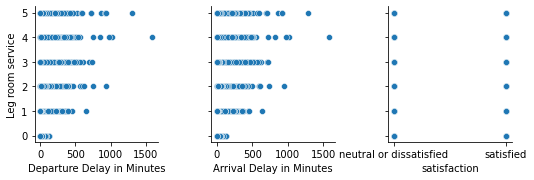

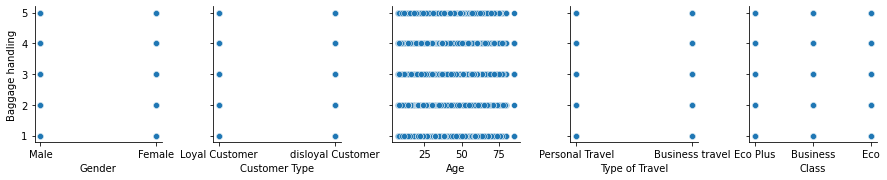

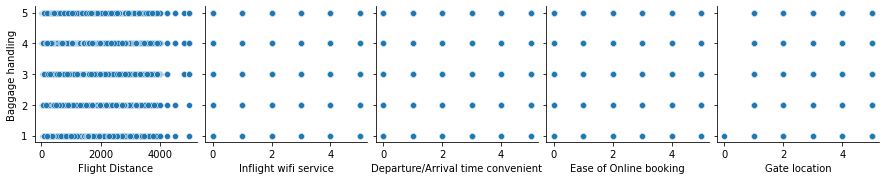

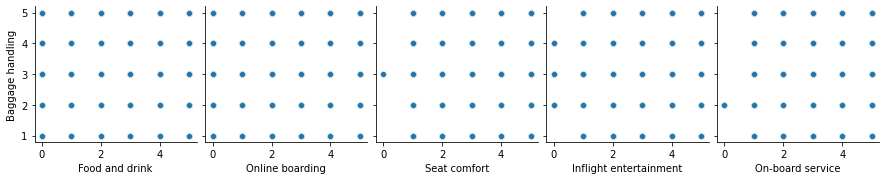

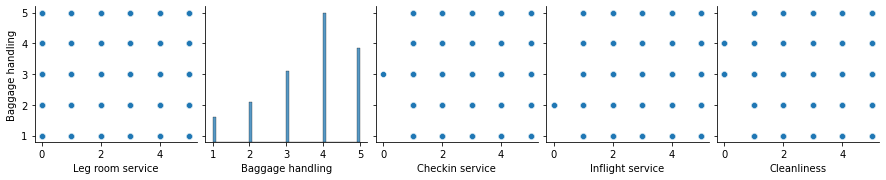

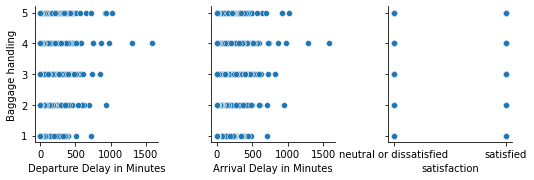

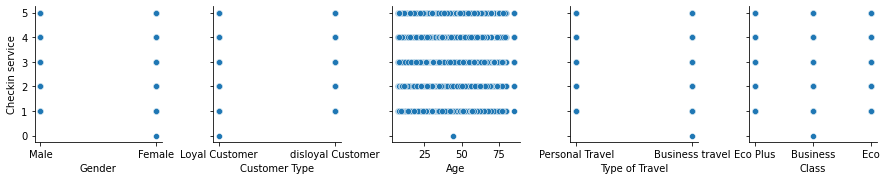

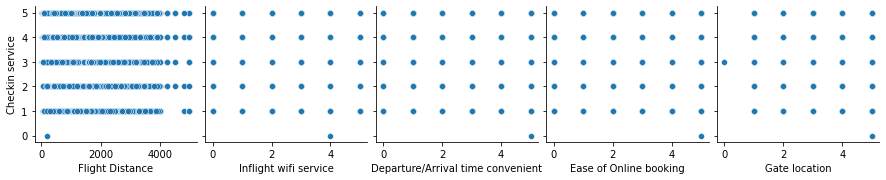

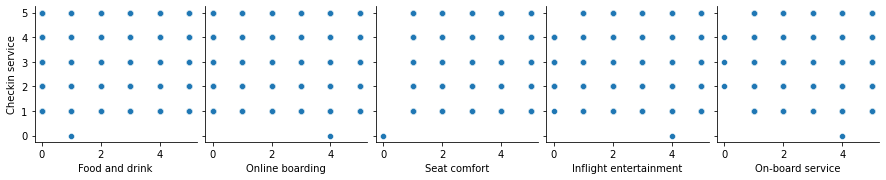

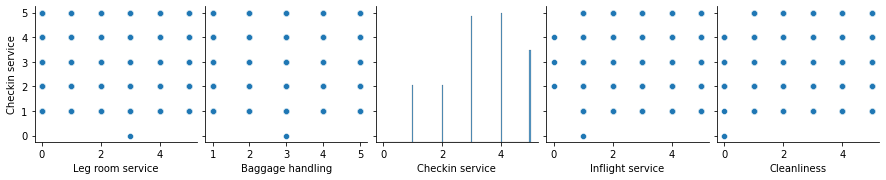

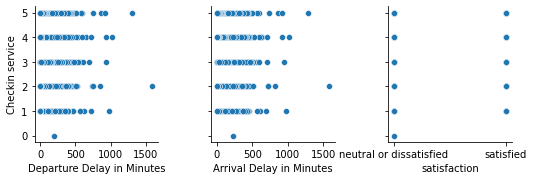

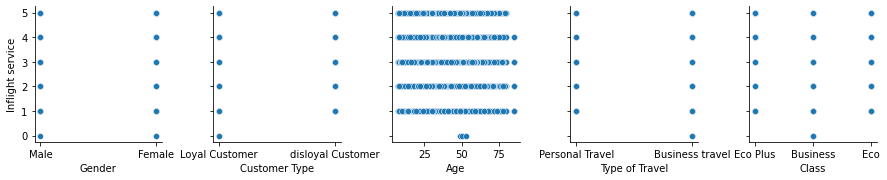

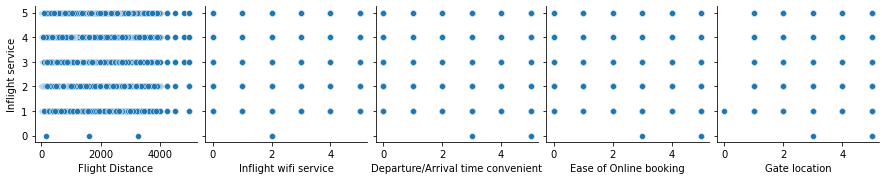

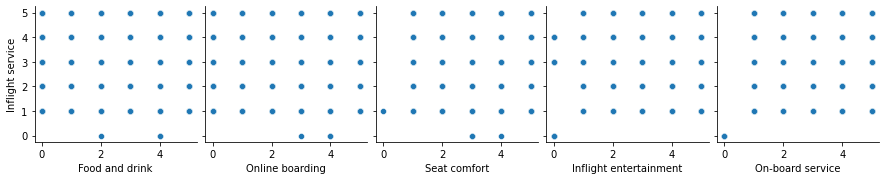

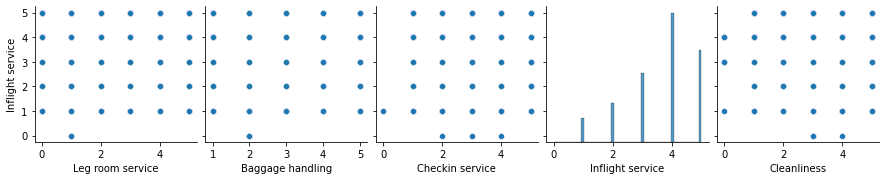

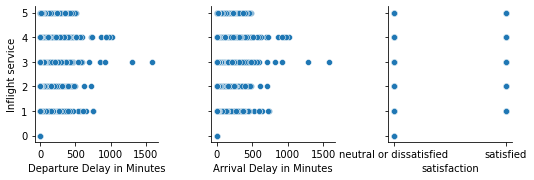

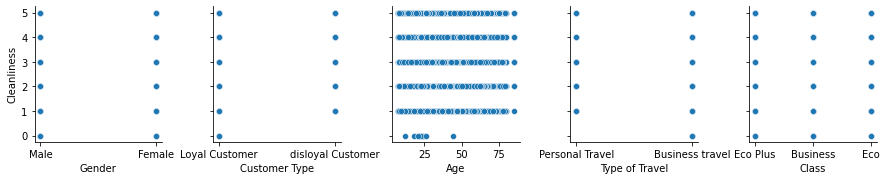

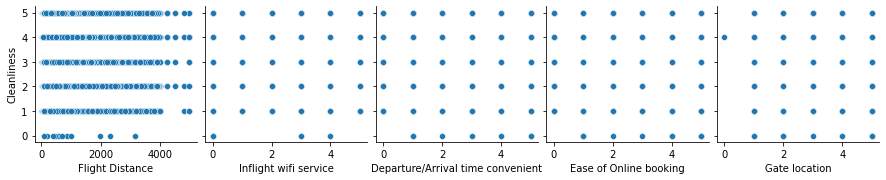

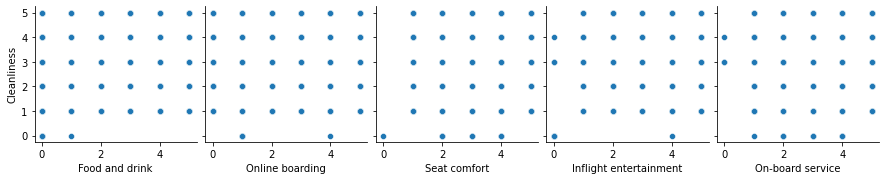

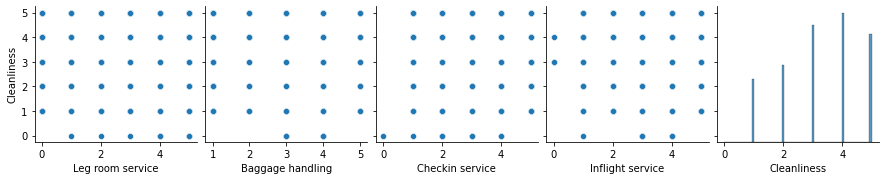

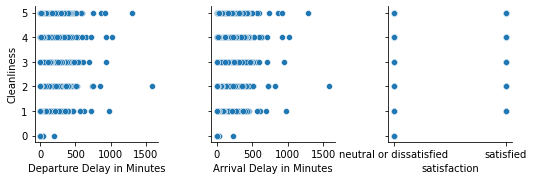

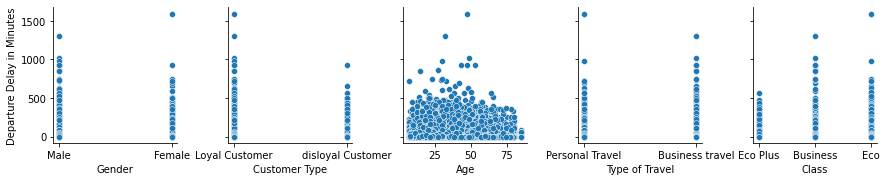

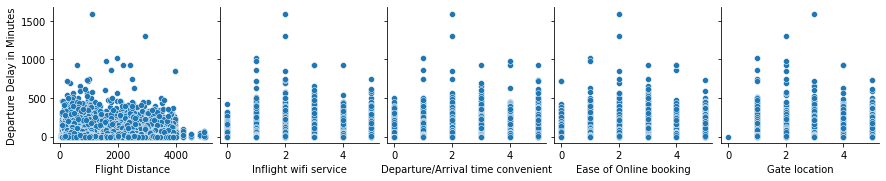

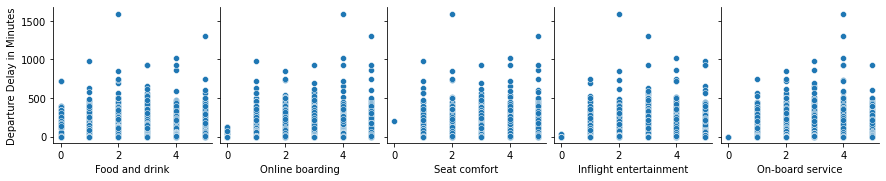

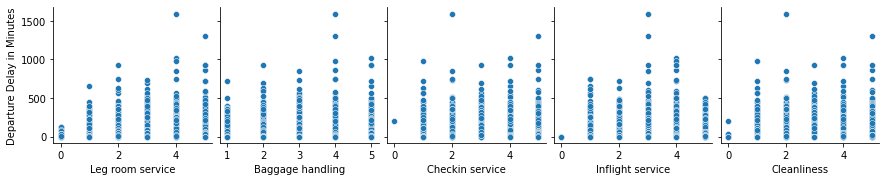

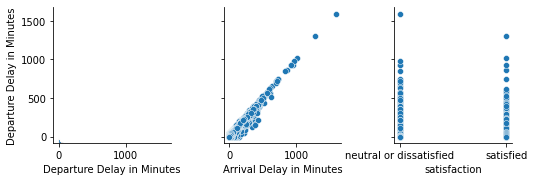

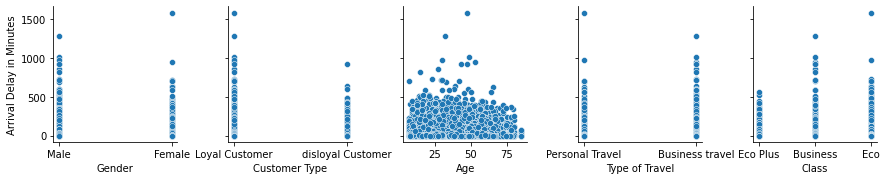

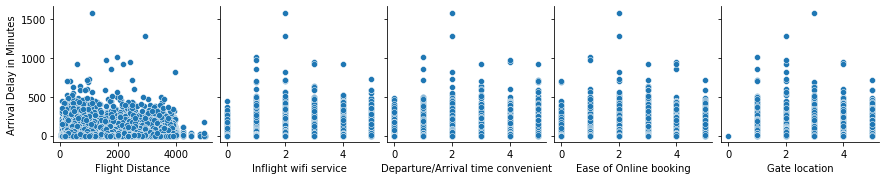

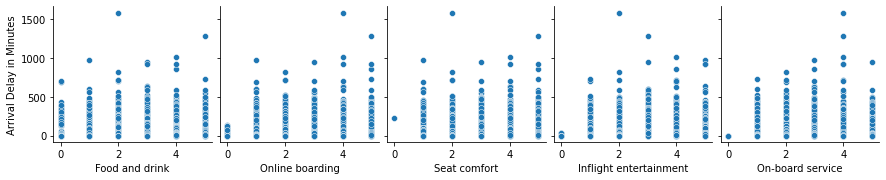

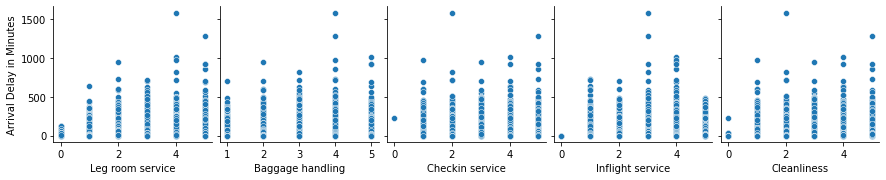

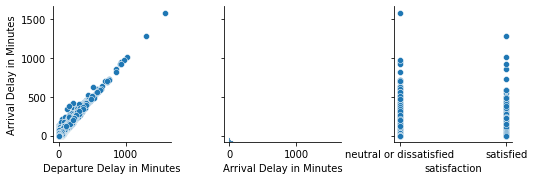

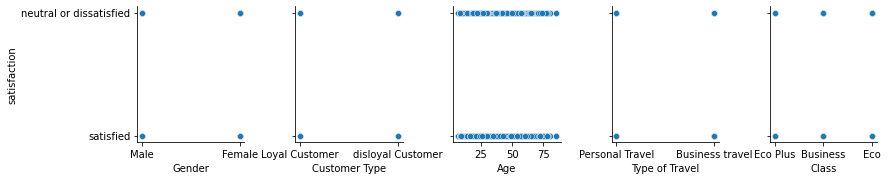

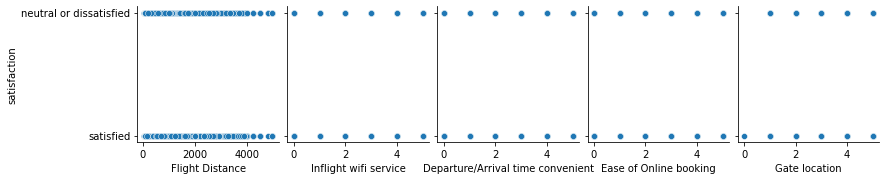

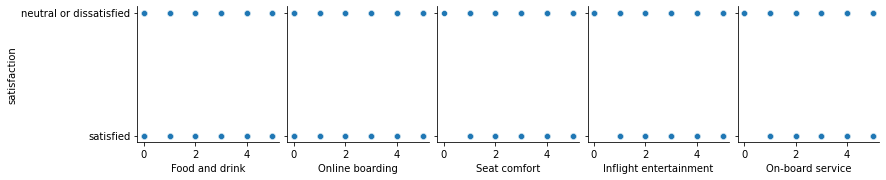

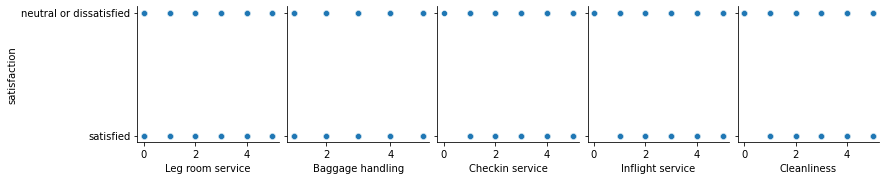

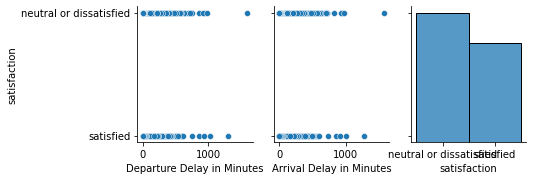

In [57]:
features = list(train.columns)

#Since unnamed and id columns are not important, let's drop these columns first.

features = features[2:].copy()

cols = list(divide_col(features, 5))

for f in features:
    for block in cols:
        pp = sns.pairplot(data=train,
                          y_vars=f,
                          x_vars=block)
    plt.show()    

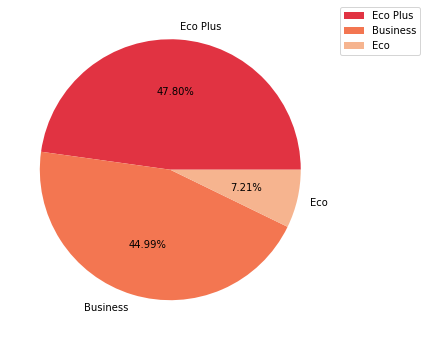

In [59]:
#Proportion between Ticket Classes

data = train['Class'].value_counts()
labels = train['Class'].unique()

#Colors of the pie chart
colors = sns.color_palette('rocket')[3:6]

fig, ax = plt.subplots(figsize=(8, 6))


#Creating a Pie Chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

As we can see above, the ECO class customers represent only a small portion, and these clients are the most neutral or dissatisfied.

In [65]:
#For the following analysis, let's change neutral or dissatisfied to 0 and satisfied to 1
new_train = train.copy()

satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
new_train.satisfaction = new_train.satisfaction.map(satisfaction_map)

The above transformation allow us to get the approximate probability of a satisfied client given the provided data. For example, if we have the following dataset:

Client | Cabin | Satisfaction
-- | -- | :-
A | Eco | 1
B | Eco | 0
C | Eco | 0
D | Eco | 0
E | Bus | 1
F | Bus | 1
G | Bus | 1
H | Bus | 0

If we take the mean only for the Eco customers, we will have the value 0.25 (1+0+0+0)/4. In this sense, with the mean we can get an idea of the probability of a customer be satisfied based on different features.

Let's see below how we can implement this in our current problem.

In [67]:
#Probability of a satisfied customer according to the Ticket Class and according to the other categorical variables

col_categ = train_cat.drop(columns='satisfaction').columns
for categ in col_categ:
    display(new_train.groupby(['Class',categ])[['satisfaction']].mean())


satisfaction
Class    Gender              
Business Female      0.690697
         Male        0.697833
Eco      Female      0.183880
         Male        0.188491
Eco Plus Female      0.235921
         Male        0.257320

satisfaction
Class    Customer Type                  
Business Loyal Customer         0.746201
         disloyal Customer      0.395459
Eco      Loyal Customer         0.200195
         disloyal Customer      0.139963
Eco Plus Loyal Customer         0.263756
         disloyal Customer      0.078322

satisfaction
Class    Type of Travel               
Business Business travel      0.720216
         Personal Travel      0.122392
Eco      Business travel      0.296194
         Personal Travel      0.101971
Eco Plus Business travel      0.393316
         Personal Travel      0.087125

,,satisfaction
Class,Class,
Business,Business,0.694251
Eco,Eco,0.186138
Eco Plus,Eco Plus,0.246064


From the data above, we can see that Business customers are much more satisfied than Economy and Economy Plus customers. Also, among the types of travel and customer types, business and loyal customers are more likely to be satisfied with their trip than customers who travel for personal reasons and/or are disloyal customers.

Finally, please that gender does not interfere with the level of customer satisfaction. This is a good indicator that there are no differences in service with respect to gender, so the airline's set of qualities can reach both genders equally.

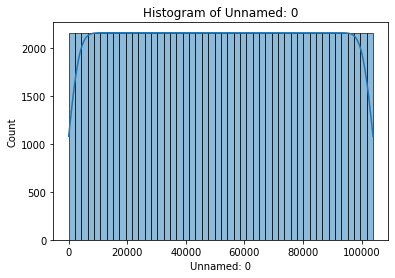

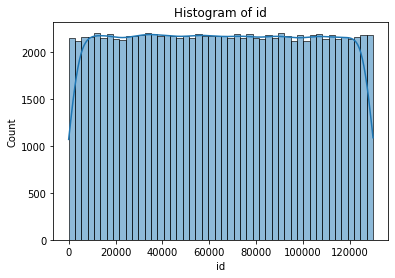

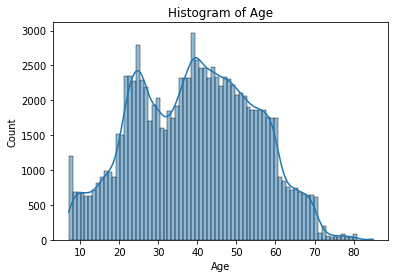

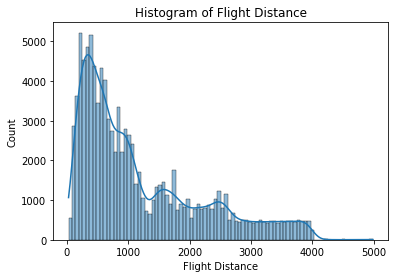

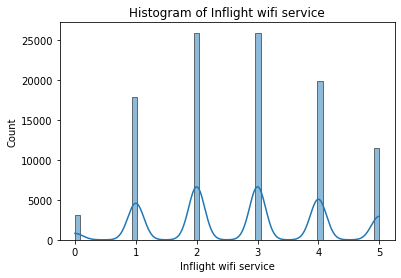

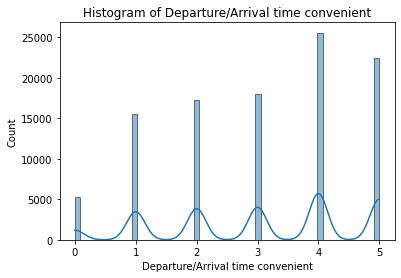

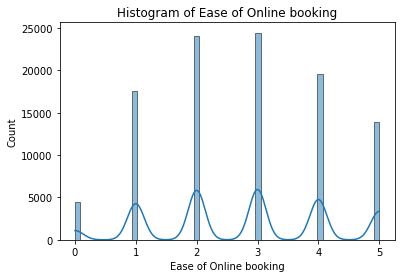

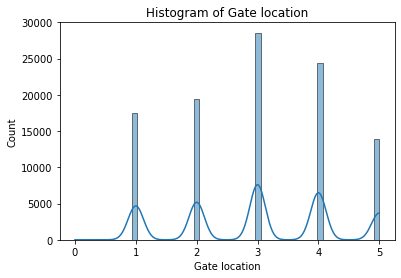

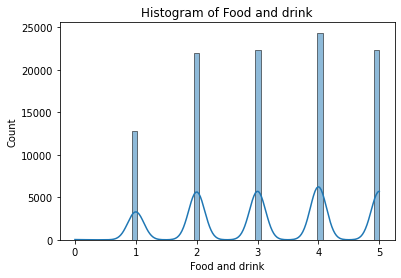

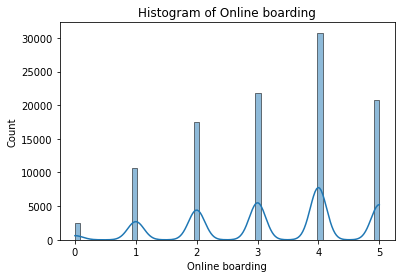

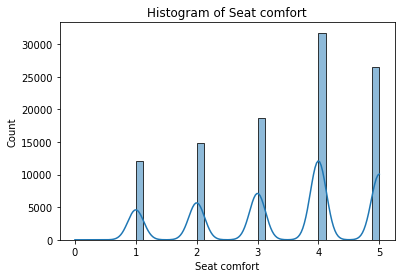

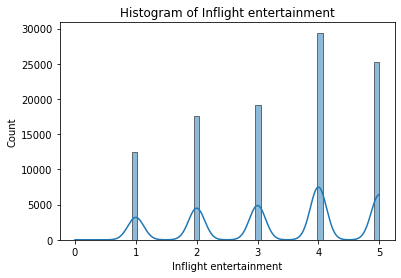

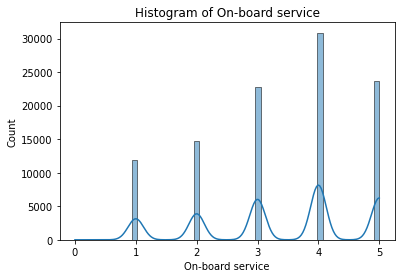

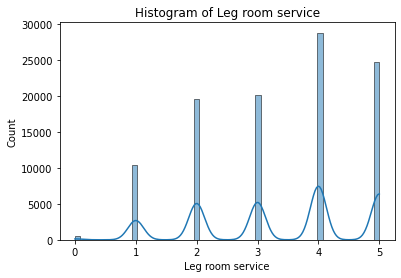

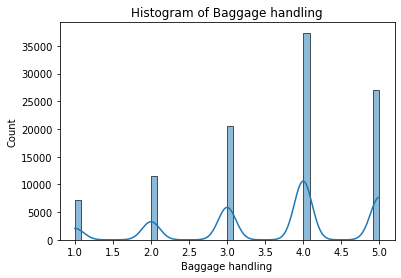

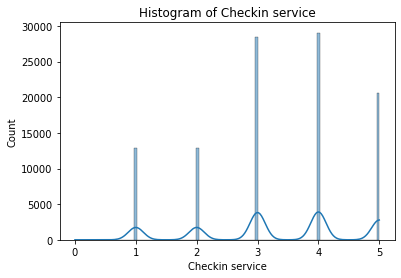

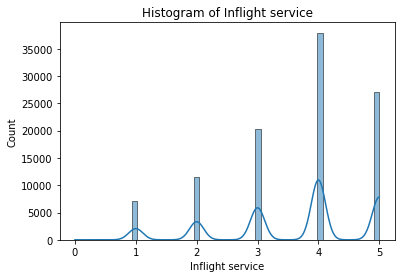

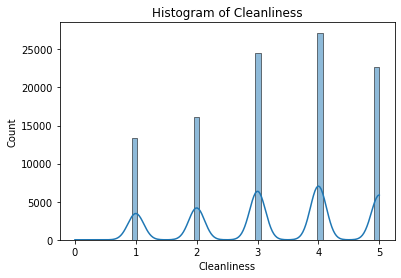

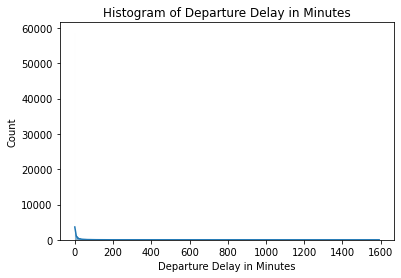

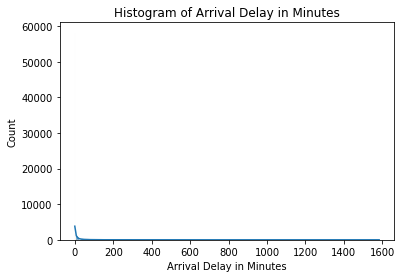

In [70]:
#Histogram for the numeric data

for col in train_num:

    sns.histplot(data=train_num, x=col, kde=True).set_title(f"Histogram of {col}")
    plt.show()

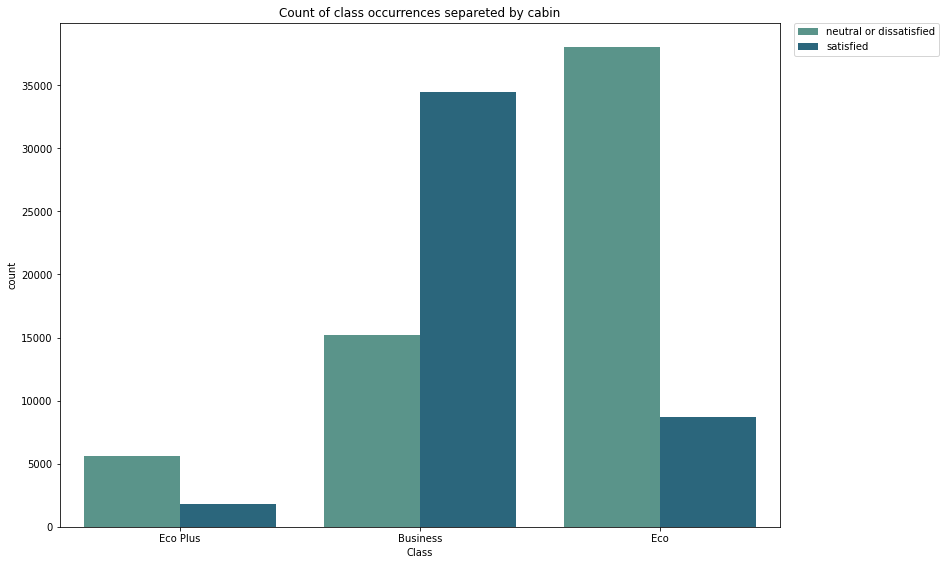

In [72]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = train, x = 'Class', hue = 'satisfaction', palette='crest')
plt.title("Count of class occurrences separeted by cabin")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [74]:
print('Count of Age\n')

print("0-15 years old:\t", train[train["Age"] <= 15].shape[0])

print("15-30 years old:\t", train[(train["Age"] > 15) & (train["Age"] <= 30)].shape[0])

print("30-45 years old:\t", train[(train["Age"] > 30) & (train["Age"] <= 45)].shape[0])

print("45+ years old:\t", train[train["Age"] > 45].shape[0])

Count of Age

0-15 years old:	 6048
15-30 years old:	 26709
30-45 years old:	 33252
45+ years old:	 37895


In [75]:
print('Count of age per gender\n')

print("0-15 years old:\n", train[train["Age"] <= 15]["Gender"].value_counts(normalize=True), "\n")

print("15-30 years old:\n",train[(train["Age"] > 15) & (train["Age"] <= 30)]["Gender"].value_counts(normalize=True), "\n")

print("30-45 years old:\n",train[(train["Age"] > 30) & (train["Age"] <= 45)]["Gender"].value_counts(normalize=True), "\n")

print("45+ years old:\n",train[train["Age"] > 45]["Gender"].value_counts(normalize=True), "\n")

Count of age per gender

0-15 anos:
 Female    0.50711
Male      0.49289
Name: Gender, dtype: float64 

15-30 anos:
 Female    0.520873
Male      0.479127
Name: Gender, dtype: float64 

30-45 anos:
 Female    0.501895
Male      0.498105
Name: Gender, dtype: float64 

45+ anos:
 Female    0.502942
Male      0.497058
Name: Gender, dtype: float64 



In [77]:
print('Count of age per satisfaction\n')
print("0-15 years old:\n", train[train["Age"] <= 15]["satisfaction"].value_counts(normalize=True), "\n")
print("15-30 years old:\n",train[(train["Age"] > 15) & (train["Age"] <= 30)]["satisfaction"].value_counts(normalize=True), "\n")
print("30-45 years old:\n",train[(train["Age"] > 30) & (train["Age"] <= 45)]["satisfaction"].value_counts(normalize=True), "\n")
print("45+ years old:\n",train[train["Age"] > 45]["satisfaction"].value_counts(normalize=True), "\n")

Count of age per satisfaction

0-15 years old:
 neutral or dissatisfied    0.855324
satisfied                  0.144676
Name: satisfaction, dtype: float64 

15-30 years old:
 neutral or dissatisfied    0.658954
satisfied                  0.341046
Name: satisfaction, dtype: float64 

30-45 years old:
 neutral or dissatisfied    0.512721
satisfied                  0.487279
Name: satisfaction, dtype: float64 

45+ years old:
 neutral or dissatisfied    0.50289
satisfied                  0.49711
Name: satisfaction, dtype: float64 



## Features correlations

<AxesSubplot:>

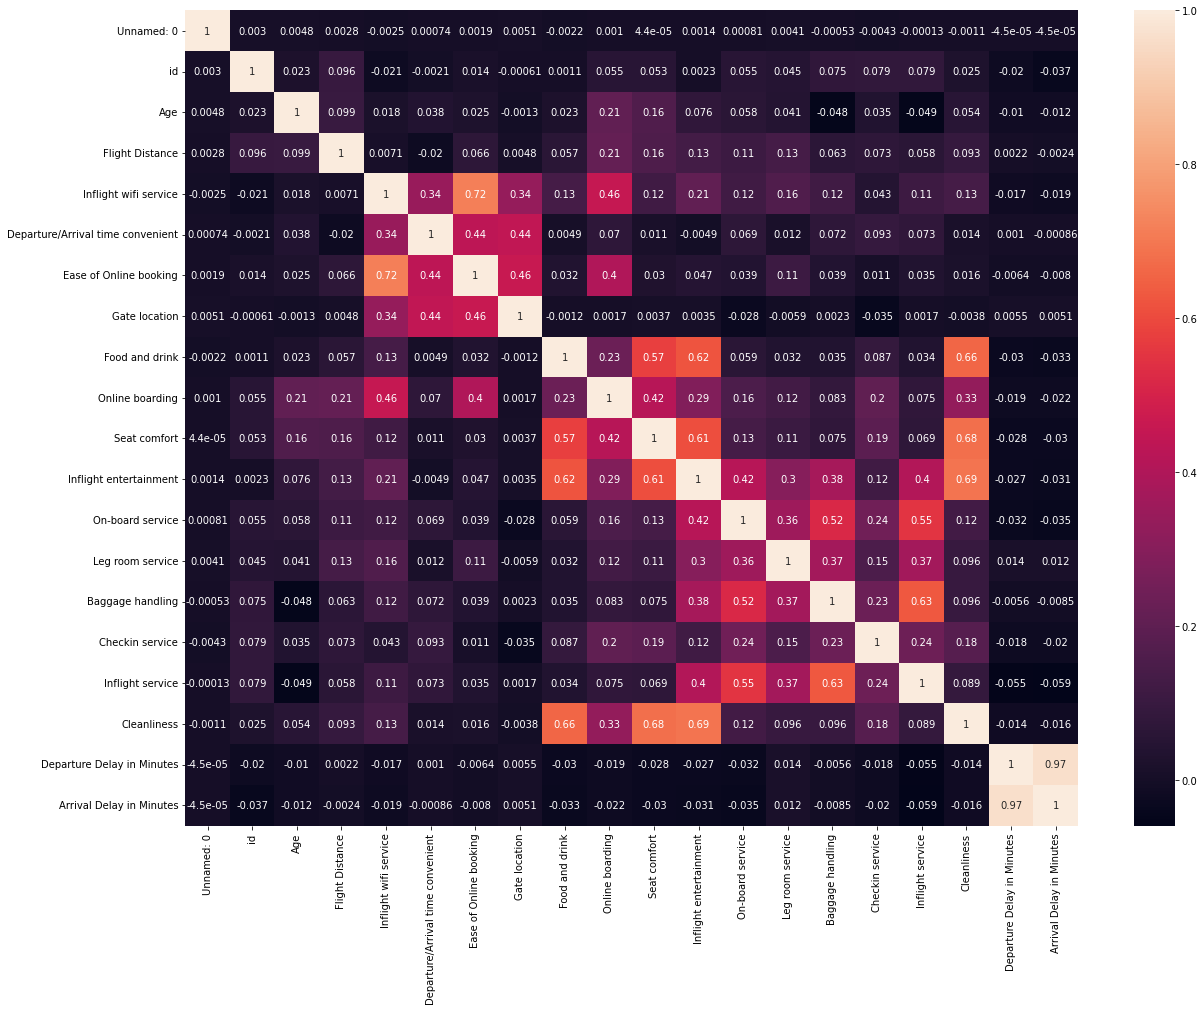

In [79]:
plt.figure(figsize=(20, 15))

sns.heatmap(train.corr(), annot=True)

In [84]:
#using the train dataset with the column satisfaction transformed to 0 and 1
new_train.corr()["satisfaction"].sort_values()

Arrival Delay in Minutes            -0.057582
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.050494
Unnamed: 0                          -0.004731
Gate location                        0.000682
id                                   0.013734
Age                                  0.137167
Ease of Online booking               0.171705
Food and drink                       0.209936
Checkin service                      0.236174
Inflight service                     0.244741
Baggage handling                     0.247749
Inflight wifi service                0.284245
Flight Distance                      0.298780
Cleanliness                          0.305198
Leg room service                     0.313131
On-board service                     0.322383
Seat comfort                         0.349459
Inflight entertainment               0.398059
Online boarding                      0.503557
satisfaction                         1.000000
Name: satisfaction, dtype: float64

In [86]:
#Let's remove outliers onlt with the features only with large amplitude
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [87]:
remove_outliers = ['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in train:
    if col in remove_outliers:
        q1 = train[col].quantile(0.25)
        q3 = train[col].quantile(0.75)
        IQR = q3 - q1
        
        lower_limit = q1 - 1.5 * IQR
        upper_limit = q3 + 1.5 * IQR
        train = train[train[col] >= lower_limit]
        train = train[train[col] <= upper_limit]
        

In [88]:
train.shape

(75165, 25)

In [89]:
# Split in X and y
X_train = train.drop(columns="satisfaction")
y_train = train['satisfaction']

X_test = test.drop(columns="satisfaction")
y_test = test['satisfaction']

# Predicting - Models

The following processes are divided into the following steps:<br>
   1. Preprocessing the data in a pipeline;
   2. Train a logistic regression model as a baseline and check the metrics;
   3. Train classic Machine Learning models and check their performance; and
   4. Training a neural network model.
    

In [93]:
#List of categorical and numerical features
num_feat = list(train_num.columns)
cat_feat = list(col_categ)

#delete 'Unnamed: 0' and 'id'
num_feat = num_feat[2:]

In [94]:
#Instantiates a preprocessor that fills nulls with median values, once the outliers may have some influence on the mean.
#Normalizes with standard scaler, the numeric variables and transforms categorical variables into dummies.
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_feat),
        ("cat", cat_transformer, cat_feat),
    ]
)

In [95]:
#Train our logistic regression model, which will serve as a baseline
pipe_logit = Pipeline([("preprocessor", preprocessor),
                       ("logit", LogisticRegression())])

pipe_logit.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('logit', LogisticRegression())])

In [96]:
def clf_metrics(modelo, X, y_true, label):
    '''
    Function to show the evaluation metrics of a model using the classification report
    '''
    print(f"\nMetrics of {label}:\n")    
    y_pred = modelo.predict(X)
    print(classification_report(y_true, y_pred))

In [106]:
clf_metrics(pipe_logit, X_train, y_train, "train")
print("#"*80)
clf_metrics(pipe_logit, X_test, y_test, "test")


Metrics of train:

                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.88     41183
              satisfied       0.87      0.83      0.85     33982

               accuracy                           0.87     75165
              macro avg       0.87      0.87      0.87     75165
           weighted avg       0.87      0.87      0.87     75165

################################################################################

Metrics of test:

                         precision    recall  f1-score   support

neutral or dissatisfied       0.82      0.92      0.87     14573
              satisfied       0.88      0.75      0.81     11403

               accuracy                           0.84     25976
              macro avg       0.85      0.83      0.84     25976
           weighted avg       0.85      0.84      0.84     25976



In [98]:
def clf_metrics_with_return(modelo, X, y_true, label):
  
    y_pred = modelo.predict(X)
    
    return classification_report(y_true, y_pred, output_dict=True)

In [99]:
def experimentos_ciclo_de_modelagem(dict_pipes,
                                    print_progress = False):
    
    resultado_experimentos = {"estimador" : [],
                              "f1_treino" : [],
                              "f1_teste" : []}

    for label, pipe in dict_pipes.items():

        if print_progress:
            print("\n")
            print("="*80)
            print(f"Estimador: {label}".center(80))
            print("(com hiperparâmetros default)".center(80))
            print("="*80)
            print("\n")

        # ================================

        pipe.fit(X_train, y_train)

        # ================================

        dict_metricas_treino = clf_metrics_with_return(pipe, X_train, y_train, "treino")

        if print_progress:
            print("#"*80)

        dict_metricas_teste = clf_metrics_with_return(pipe, X_test, y_test, "teste")

        # metrics f1_score
        f1_treino = dict_metricas_treino["weighted avg"]["f1-score"]
        f1_teste = dict_metricas_teste["weighted avg"]["f1-score"]

        # ================================
        # storing the results

        resultado_experimentos["estimador"].append(label)
        resultado_experimentos["f1_treino"].append(f1_treino)
        resultado_experimentos["f1_teste"].append(f1_teste)


    df_results = pd.DataFrame(resultado_experimentos)

    df_results["gap"] = (df_results["f1_treino"] - df_results["f1_teste"]).apply(lambda x: x if x > 0 else np.inf)

    df_results = df_results.sort_values("f1_teste", ascending=False).sort_values("gap")

    return df_results

In [100]:
#Training other classic models
pipe_rf = Pipeline([("preprocessor", preprocessor),
                    ("rf", RandomForestClassifier(random_state=42))])

pipe_lgbm = Pipeline([("preprocessor", preprocessor),
                      ("lgbm", LGBMClassifier(random_state=42))])

pipe_knn = Pipeline([("preprocessor", preprocessor),
                     ("knn", KNeighborsClassifier())])

# =======================================

dict_pipes = {"random_forest" : pipe_rf,
              "lgbm" : pipe_lgbm,
              "knn" : pipe_knn}

# =======================================

df_results = experimentos_ciclo_de_modelagem(dict_pipes,
                                             print_progress = False)

df_results

,estimador,f1_treino,f1_teste,gap
1,lgbm,0.963796,0.963664,0.000132
2,knn,0.943256,0.910123,0.033132
0,random_forest,1.000000,0.961862,0.038138


Of the above models, lightgbm had better f1 score, and the gap between the training and testing f1 of lgbm was quite low.

Furthermore, we can notice some overfitting in the random forest model. This may have happened mainly because no hyperparameter was defined when instantiating these models.

To see if we can improve the random forest, we will use the random search for the optimization of the hyperparameters.

### Random Forest with hyperparameter optimization

In [101]:
# pipeline
pipe_rf = Pipeline([("preprocessor", preprocessor),
                    ("rf", RandomForestClassifier(n_jobs=-1, random_state=42))])

params_distributions = {"rf__n_estimators" : np.arange(100, 1501, 1), 
                        "rf__max_depth" : np.arange(2, 9, 1)}

# cross validation
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# random search
rand_grid_rf = RandomizedSearchCV(pipe_rf, 
                                  params_distributions, 
                                  n_iter=20,
                                  cv=splitter,
                                  scoring="f1_weighted",
                                  verbose=10,
                                  n_jobs=-1,
                                  random_state=42,
                                  return_train_score=True)

rand_grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Flight '
                                                                                'Distance',
                                                                                'Inflight '
                                                                                'wifi '
                                                                                'service',
                                                                                'Departure/Arrival '
                                                                                'time '
                                                                                'convenient',
                                                                                'Ease '
                                                                                'of...
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type',
                                                                                'Type '
                                                                                'of '
                                                                                'Travel',
                                                                                'Class'])])),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'rf__max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                                        'rf__n_estimators': array([ 100,  101,  102, ..., 1498, 1499, 1500])},
                   random_state=42, return_train_score=True,
                   scoring='f1_weighted', verbose=10)

In [102]:
rand_grid_rf.best_params_

{'rf__n_estimators': 365, 'rf__max_depth': 7}

In [103]:
rand_grid_rf.best_params_['rf__n_estimators']

365

In [105]:
pipe_rf = Pipeline([("preprocessor", preprocessor),
                    ("rf", RandomForestClassifier(random_state=42))]).set_params(**{'rf__n_estimators': rand_grid_rf.best_params_['rf__n_estimators'],
                                                                                    'rf__max_depth': rand_grid_rf.best_params_['rf__max_depth']})

pipe_rf.fit(X_train, y_train)

# ================================

clf_metrics(pipe_rf, X_train, y_train, "train")
print("#"*80)
clf_metrics(pipe_rf, X_test, y_test, "test")


Metrics of train:

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.95      0.94     41183
              satisfied       0.94      0.91      0.93     33982

               accuracy                           0.93     75165
              macro avg       0.93      0.93      0.93     75165
           weighted avg       0.93      0.93      0.93     75165

################################################################################

Metrics of test:

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.94      0.94     14573
              satisfied       0.93      0.92      0.92     11403

               accuracy                           0.93     25976
              macro avg       0.93      0.93      0.93     25976
           weighted avg       0.93      0.93      0.93     25976



With hyperparameter optimization we were able to solve the overfitting problem and still bring metrics a little closer to lgbm

In [107]:
df_feat_import = pd.DataFrame(pipe_rf['rf'].feature_importances_, index=preprocessor.get_feature_names_out(), columns=['feature importance'])
df_feat_import.sort_values(by="feature importance", ascending=False)

,feature importance
num__Online boarding,0.207494
num__Inflight wifi service,0.150995
cat__Class_Business,0.089635
cat__Type of Travel_Personal Travel,0.080684
cat__Type of Travel_Business travel,0.079777
num__Inflight entertainment,0.069287
cat__Class_Eco,0.044048
num__Ease of Online booking,0.041662
num__Seat comfort,0.041463
cat__Customer Type_Loyal Customer,0.034754


# Neural networks

Finally, let's see if a neural network can deliver such good results.

In [108]:
tf.random.set_seed(42)
model = Sequential(
    [
        Dense(27, activation = 'relu', input_shape=(27,),  name = "L1"),
        Dense(40, activation = 'relu',   name = "L2"),
        Dense(30, activation = 'relu',   name = "L3"),
        Dense(1, activation = 'sigmoid', name = "L4")
    ]
)

In [109]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)


In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 27)                756       
                                                                 
 L2 (Dense)                  (None, 40)                1120      
                                                                 
 L3 (Dense)                  (None, 30)                1230      
                                                                 
 L4 (Dense)                  (None, 1)                 31        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [111]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta=0.001,
                           patience = 30,
                           verbose = 1,
                           mode = 'auto')

In [112]:
model_es = KerasClassifier(model=model, verbose=1, epochs=100, validation_split = 0.3, callbacks=[early_stop])

In [113]:
pipe_nn = Pipeline([("preprocessor", preprocessor),
                    ("nn", model_es)])


In [114]:
pipe_nn.fit(X_train, y_train)

Epoch 1/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1822 - val_loss: 0.1376
Epoch 2/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1325 - val_loss: 0.1284
Epoch 3/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1213 - val_loss: 0.1130
Epoch 4/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1158 - val_loss: 0.1126
Epoch 5/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1110 - val_loss: 0.1048
Epoch 6/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1094 - val_loss: 0.1070
Epoch 7/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1066 - val_loss: 0.1073
Epoch 8/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1070 - val_loss: 0.1053
Epoch 9/100
1645/1645 [==============================] - 3s 2ms/step - loss: 0.1049 - val_loss: 0.1069
Epoch 10/100
1645/1645 [==============================] - 3s 2ms/step - l

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment'...
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('nn',
                 KerasClassifier(callbacks=[<keras.callbacks.EarlyStopping object at 0x000002A90EFC89D0>], epochs=100, model=<keras.engine.sequential.Sequential object at 0x000002A917017790>, validation_split=0.3))])

In [115]:
# ================================
clf_metrics(pipe_nn, X_train, y_train, "train")
print("#"*80)
clf_metrics(pipe_nn, X_test, y_test, "test")


Metrics of train:

2349/2349 [==============================] - 2s 935us/step
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     41183
              satisfied       0.98      0.93      0.96     33982

               accuracy                           0.96     75165
              macro avg       0.96      0.96      0.96     75165
           weighted avg       0.96      0.96      0.96     75165

################################################################################

Metrics of test:

812/812 [==============================] - 1s 1ms/step
                         precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.98      0.94     14573
              satisfied       0.98      0.86      0.91     11403

               accuracy                           0.93     25976
              macro avg       0.94      0.92      0.93     25976
           weighted avg       0.93      0.93  

From the metrics above, we see that a simple neural network performs really well too.